In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
!wget -O "wcst_behavior.csv" "https://osf.io/q7kej/download"

In [4]:
df = pd.read_csv("wcst_behavior.csv", sep=" ")
df.columns

Index(['subjID', 'gain', 'loss', 'odd_response', 'RT', 'meta_choice',
       'rule_choice', 'resp_choice', 'resp_color', 'resp_form', 'resp_number'],
      dtype='object')

In [63]:
gain = df["gain"].to_numpy()

li = []
streak = 0

for i in range(1, gain.shape[0]):
    
    if gain[i] == 1:
        streak += 1
    elif gain[i] == 0 and gain[i-1] == 1:
   
        li.append(streak)
        streak = 0 #reset
    
print(li[:20])
print("min:", min(li), "max:", max(li))

[2, 6, 4, 3, 2, 1, 2, 3, 2, 1, 1, 4, 1, 1, 1, 2, 2, 6, 1, 1]
min: 1 max: 12


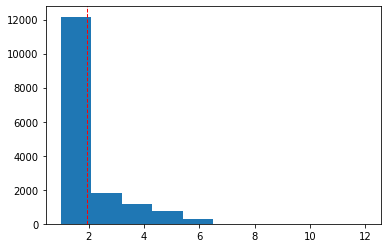

In [56]:
plt.hist(li)
plt.axvline(sum(li)/len(li), color='r', linestyle='dashed', linewidth=1)

In [48]:
idx = df["subjID"].to_numpy()
idx = set(idx)
n = len(idx)
print(n)
print(idx)

375
{1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 31, 32, 33, 34, 35, 37, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236

In [52]:
d = df[["gain", "rule_choice", "subjID"]].to_numpy()

perseverative_error_list = []
set_loss_error_list = []

for ix in idx:
    
    switch_count = 0
    repeat_count = 0

    perseverative_error = 0
    set_loss_error = 0

    for i in range(1, d.shape[0]):   
           
        if ix == d[i][2]:
            
            if d[i-1][0] == 0:
                switch_count +=1

                if d[i-1][1] == d[i][1]:
                    perseverative_error += 1

            if d[i-1][0] == 1:
                repeat_count +=1
                
                if d[i-1][1] != d[i][1]:
                    set_loss_error += 1

    perseverative_error_list.append(perseverative_error/switch_count)
    set_loss_error_list.append(set_loss_error/repeat_count)
        
        

print("mean perseverative error:", sum(perseverative_error_list)/n)
print("mean set-loss error:", sum(set_loss_error_list)/n)

mean perseverative error: 0.12480905149747154
mean set-loss error: 0.0780393920066116
